## 1. Importing necessary libraries

In [ ]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import base64
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import gc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

pd.set_option('display.max_columns', None)   

from sklearn.model_selection import train_test_split

## 2. Loading datasets

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/Encoding_train.csv')
sample = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/spaceship-titanic/sample_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/Age_test.csv')
#test = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/NotEncoding_AgeGroup_test.csv')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/NotEncoding_train.csv')
sample = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/spaceship-titanic/sample_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/Age_test.csv')
#test = pd.read_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/NotEncoding_AgeGroup_test.csv')

In [ ]:
train.head()

,Unnamed: 0,PassengerId,Cabin_number,Age,RoomService,Age_group,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,VIP_True
0,0,0001_01,0,39.0,0.0,Age_31-50,0.0,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
1,1,0002_01,0,24.0,109.0,Age_18-25,9.0,25.0,549.0,44.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,2,0003_01,0,58.0,43.0,Age_51+,3576.0,0.0,6715.0,49.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1
3,3,0003_02,0,33.0,0.0,Age_31-50,1283.0,371.0,3329.0,193.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,4,0004_01,1,16.0,303.0,Age_13-17,70.0,151.0,565.0,2.0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
train.shape

(8693, 25)

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 8693 non-null   int64  
 1   PassengerId                8693 non-null   object 
 2   Cabin_number               8693 non-null   int64  
 3   Age                        8693 non-null   float64
 4   RoomService                8693 non-null   float64
 5   Age_group                  8693 non-null   object 
 6   FoodCourt                  8693 non-null   float64
 7   ShoppingMall               8693 non-null   float64
 8   Spa                        8693 non-null   float64
 9   VRDeck                     8693 non-null   float64
 10  Transported                8693 non-null   int64  
 11  HomePlanet_Europa          8693 non-null   int64  
 12  HomePlanet_Mars            8693 non-null   int64  
 13  CryoSleep_True             8693 non-null   int64

In [ ]:
test.head()

,Unnamed: 0,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin_number,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_side_S,VIP_True
0,0,0013_01,27.0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,3.0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
1,1,0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,4.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
2,2,0019_01,31.0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0.0,1,0,1,0,0,0,1,0,0,0,0,0,1,0
3,3,0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,1.0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,4,0023_01,20.0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,5.0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [ ]:
test.shape

(4277, 24)

In [ ]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 4277 non-null   int64  
 1   PassengerId                4277 non-null   object 
 2   Age                        4277 non-null   float64
 3   RoomService                4195 non-null   float64
 4   FoodCourt                  4171 non-null   float64
 5   ShoppingMall               4179 non-null   float64
 6   Spa                        4176 non-null   float64
 7   VRDeck                     4197 non-null   float64
 8   Name                       4183 non-null   object 
 9   Cabin_number               4177 non-null   float64
 10  HomePlanet_Europa          4277 non-null   int64  
 11  HomePlanet_Mars            4277 non-null   int64  
 12  CryoSleep_True             4277 non-null   int64  
 13  Destination_PSO J318.5-22  4277 non-null   int64

## 3. Preprocessing

In [ ]:
def get_score(model,X,y):
    n = cross_val_score(model,X,y,scoring ='accuracy',cv=20)
    return n

In [ ]:
# Best XGBoost hyperparams, found through 1000 Optuna trials
params_XGB_best ={'lambda': 3.0610042624477543, 
             'alpha': 4.581902571574289, 
             'colsample_bytree': 0.9241969052729379, 
             'subsample': 0.9527591724824661, 
             'learning_rate': 0.06672065863100594, 
             'n_estimators': 725, #initial value is 651
             'max_depth': 5, 
             'min_child_weight': 1, 
             'num_parallel_tree': 1}

In [ ]:
train_test=train.append(test)

<ipython-input-31-d2734cde2921>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_test=train.append(test)


Unnamed: 0                      0
PassengerId                     0
Cabin_number                  100
Age                             0
RoomService                    82
Age_group                    4277
FoodCourt                     106
ShoppingMall                   98
Spa                           101
VRDeck                         80
Transported                  4277
HomePlanet_Europa               0
HomePlanet_Mars                 0
CryoSleep_True                  0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
Cabin_deck_B                    0
Cabin_deck_C                    0
Cabin_deck_D                    0
Cabin_deck_E                    0
Cabin_deck_F                    0
Cabin_deck_G                    0
Cabin_deck_T                    0
Cabin_side_S                    0
VIP_True                        0
Name                         8787
dtype: int64


<Axes: >

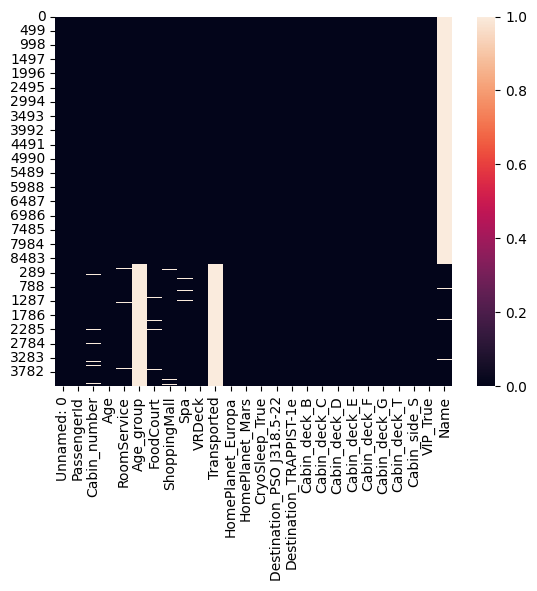

In [ ]:
print(train_test.isnull().sum())
sns.heatmap(train_test.isnull())

In [ ]:
print(train_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 12970 non-null  int64  
 1   PassengerId                12970 non-null  object 
 2   Cabin_number               12870 non-null  float64
 3   Age                        12970 non-null  float64
 4   RoomService                12888 non-null  float64
 5   Age_group                  8693 non-null   object 
 6   FoodCourt                  12864 non-null  float64
 7   ShoppingMall               12872 non-null  float64
 8   Spa                        12869 non-null  float64
 9   VRDeck                     12890 non-null  float64
 10  Transported                8693 non-null   float64
 11  HomePlanet_Europa          12970 non-null  int64  
 12  HomePlanet_Mars            12970 non-null  int64  
 13  CryoSleep_True             12970 non-null  int6

In [ ]:
##############################
# Let's define some settings ##
###############################
optuna_study = "ON"
XGB_study = "OFF"

gpu_switch = "OFF"
skf = StratifiedKFold(n_splits=10)

## Let's apply SimpleImputer + OneHotEncoder.

In [ ]:
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_side', 'Cabin_deck']

In [ ]:
# train_test[cat_cols] = train_test[cat_cols].astype('category')

## Let's split train and test set

In [ ]:
train = train_test[train_test['Transported'].notnull()].copy()
train.Transported =train.Transported.astype('int')
test = train_test[train_test['Transported'].isnull()].drop("Transported",axis=1)

In [ ]:
X = train.drop(['Transported', 'Name', 'PassengerId', 'Age_group'],axis=1)
y = train.Transported

In [ ]:
X,y = shuffle(X,y)
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [ ]:
print(get_score(xgb.XGBClassifier(**params_XGB_best),X,y).mean())

0.8110016420361248


## 4. Modeling

In [ ]:
###############################
# Let's define some settings ##
###############################
optuna_study = "ON"
# LGBM_study = "OFF"
XGB_study = "OFF"
# CAT_study = "OFF"


gpu_switch = "OFF"
skf = StratifiedKFold(n_splits=10)

## 5. XGB

In [ ]:
# Check if GPU usage is enabled
if gpu_switch == "ON":
    # If so, use GPU-optimized tree_method
    method = "gpu_hist"
else:
    # Otherwise, use CPU-optimized tree_method
    method = "hist"

# Define a function for hyperparameter tuning
def objective(trial):
    # Print a message to indicate that the function has started
    print("START__________________________________")
    
    # Initialize a dictionary of hyperparameters
    param = {  
        'tree_method': method,  # Use the specified tree_method
        'objective': 'binary:logistic',  # Binary classification problem
        'eval_metric': 'logloss',  # Use logloss as evaluation metric
        'lambda': trial.suggest_float('lambda', 0, 10.0),  # L2 regularization parameter
        'alpha': trial.suggest_float('alpha', 0, 10.0),  # L1 regularization parameter
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1,1.0),  # Feature subsampling ratio
        'subsample': trial.suggest_float('subsample', 0.2,1.0),  # Data subsampling ratio
        'learning_rate': trial.suggest_float('learning_rate', 0.0001,0.1),  # Learning rate
        'n_estimators': trial.suggest_int('n_estimators', 100,3000),  # Number of trees in the ensemble
        'max_depth': trial.suggest_categorical('max_depth', [2,3,4,5,6,7,8,9,10]),  # Maximum depth of a tree
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum sum of instance weight needed in a child
        'num_parallel_tree': trial.suggest_int('num_parallel_tree',1,1),  # Number of parallel trees constructed during each iteration
        #'early_stopping_rounds':200,  # Early stopping rounds
        }
    
    # Create lists to store the results and number of iterations for each fold
    results=[]
    n_iterations=[]
    
    # Loop over each fold in the cross-validation
    for train_index, test_index in skf.split(X, y):
        # Split the data into training and validation sets
        train_X, valid_X = X.iloc[train_index], X.iloc[test_index]
        train_y, valid_y = y.iloc[train_index], y.iloc[test_index]
        
        # Train an XGBoost model with the hyperparameters specified in param
        model = xgb.XGBClassifier(**param).fit(train_X,train_y,
                                      eval_set=[(valid_X,valid_y)],
                                      verbose=0
                                     )  
        # Get the number of iterations for the best model (not used in this code)
        #n_iteration = model.get_booster().best_iteration
        #n_iterations.append(n_iteration)
        
        # Calculate the accuracy score of the model on the validation set
        result = accuracy_score(valid_y,(model.predict(valid_X)))
        results.append(result)
        
    # Calculate the mean accuracy score across all folds
    n=sum(results)/len(results) 
    
    # Print the mean accuracy score and a message to indicate that the function has finished
    print (n)
    print("FIIINISH__________________________________\n")
    
    # Return the mean accuracy score as the objective value for the hyperparameter tuning
    return n


if optuna_study == XGB_study:
    study = optuna.create_study(pruner=optuna.pruners.HyperbandPruner(),
                                direction='maximize')
    study.optimize(objective, n_trials=1000)

In [ ]:
#Trial 992 finished with value: 0.8112
params_XGB_best= {'lambda': 3.0610042624477543, 
             'alpha': 4.581902571574289, 
             'colsample_bytree': 0.9241969052729379, 
             'subsample': 0.9527591724824661, 
             'learning_rate': 0.06672065863100594, 
             'n_estimators': 730, #initial value is 651
             'max_depth': 5, 
             'min_child_weight': 1, 
             'num_parallel_tree': 1}

## 6. Submission

In [ ]:
# Check the columns of the test data
print(test.columns)




Index(['Unnamed: 0', 'PassengerId', 'Cabin_number', 'Age', 'RoomService',
       'Age_group', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_B',
       'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E', 'Cabin_deck_F',
       'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_side_S', 'VIP_True', 'Name'],
      dtype='object')


In [ ]:
# Select only the relevant features from the test data
test_subset = test[X.columns]

# Use the XGBoost model with optimized hyperparameters to make predictions
pred_XGB_best = xgb.XGBClassifier(**params_XGB_best).fit(X, y).predict(test_subset)

# Update the 'Transported' column in the sample DataFrame
sample['Transported'] = pred_XGB_best
sample['Transported'] = sample['Transported'] > 0.5

# Save the submission predictions to a CSV file
sample.to_csv('/content/drive/MyDrive/CUAI_BASIC/최종 모델링/submission.csv', index=False)

In [ ]:
print(get_score(xgb.XGBClassifier(**params_XGB_best),X,y).mean())

0.8110037607924149
